In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

In [2]:
# We plan to predict the Temperature from phenological factors NDVI and EVI.
# NDVI and EVI are independent variables. Temperature is dependent variable.
# To predict Temperature values, we will use Machine Learning techniques.
# To train our model, we will use the data available from Jan 2018 to Dec 2018.
# The region under consideration is Ahmedabad-Gandhinagar, Gujarat.
# The frequency of data is 32 days.

In [3]:
# reading the training data stored in csv file

data = pd.read_csv('data_img_train_ahd.csv', header=None)

In [4]:
# Entries with missing values are removed
# Column with index 0 represents NDVI.
# Column with index 1 represents EVI.
# Column with index 2 represents Temperature.

In [5]:
# Let us start with basic plotting of our variables in Training set.
# This will give us an idea about the kind and range of data we are dealing with.

In [6]:
# X is the collection of independent variables.

X = data[[0, 1]]
std_X = preprocessing.scale(X)


In [7]:
# Y contains the dependent variable.

Y = data[2]
std_Y = preprocessing.scale(Y)

Text(0, 0.5, 'Temperature')

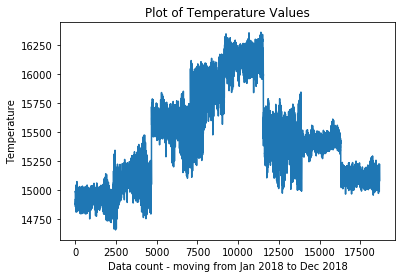

In [8]:
Y.plot.line(title='Plot of Temperature Values')
plt.xlabel('Data count - moving from Jan 2018 to Dec 2018')
plt.ylabel('Temperature')

In [9]:
X[0].plot.line(title='Plot of NDVI')
plt.xlabel('Data count - moving from Jan 2018 to Dec 2018')
plt.ylabel('NDVI')

Text(0, 0.5, 'NDVI')

In [10]:
X[1].plot.line(title='Plot of EVI')
plt.xlabel('Data count - moving from Jan 2018 to Dec 2018')
plt.ylabel('EVI')

Text(0, 0.5, 'EVI')

In [11]:
# Let's briefly describe our data

In [12]:
data.describe()

0             1             2
count  18689.000000  18689.000000  18689.000000
mean    3908.126920   2416.343090  15439.525817
std     1157.555951    759.706203    395.751627
min     1064.000000    514.000000  14655.000000
25%     3180.000000   1961.000000  15103.000000
50%     3852.000000   2360.000000  15414.000000
75%     4616.000000   2807.000000  15664.000000
max     8375.000000   6824.000000  16360.000000

In [13]:
# Let's start with Machine Learning models.

In [14]:
# We will develop Multi-variate Polynomial Regression Models of different degrees.
# What is Polynomial Regression?
# Polynomial Regression is a machine learning method in which the dependent variable is represented as a polynomial function of independent variables.
# The degree of Polynomial Regression is the highest degree of the individual terms of the polynomial.
# A + B*X has degree 1.
# A + B*X + C*X^2 has degree 2.

In [15]:
# X_new are the new parameters formed by the different linear combinations of our original parameters in X.
# The number of new parameters depend on the degree.
# Now we apply the usual multi-variate Ridge Regression assuming these new parameters as separate parameters.
# Ridge Regression is Linear Regression with the parameters regularized.
# This helps us reduce the chances of overfitting.
# Here, we take the default value of regularization paramter 'alpha' = 0.5

poly = PolynomialFeatures(degree=5)
X_new = poly.fit_transform(std_X)

In [16]:
r1 = Ridge()

In [17]:
# r1_pred contains the predicted values.

In [18]:
r1.fit(X_new, std_Y)
r1_pred = r1.predict(X_new)

In [19]:
# Now that we have the predicted values, let's plot them with the actual values.
# This will give us a qualitative idea about the performance of the model.

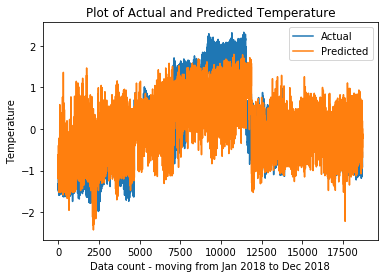

In [20]:
l1 = pd.DataFrame(std_Y).values.tolist()
l2 = r1_pred.tolist()
plt.plot(l1, label='Actual')
plt.plot(l2, label='Predicted')
plt.xlabel('Data count - moving from Jan 2018 to Dec 2018')
plt.ylabel('Temperature')
plt.title('Plot of Actual and Predicted Temperature')
plt.legend()
plt.show()

In [21]:
print("The R-squared = ",r1.score(X_new, std_Y))
print("MSE = ",mean_squared_error(std_Y, r1_pred))

The R-squared =  0.4682443478666141
MSE =  0.5317556521333858


In [22]:
# Increasing the degree, from here onwards, leads to overfitting.
# Overfitting gives very low results on testing.
# Overfitted models give high accuracy on training set but low results on testing set.

In [23]:
# We now test our model.

In [24]:
# reading the testing data stored in csv file

data_test = pd.read_csv('data_img_test _ahd.csv', header=None)

In [25]:
X_test = data_test[[0, 1]]
std_X_test = preprocessing.scale(X_test)

In [26]:
Y_test = data_test[2]
std_Y_test = preprocessing.scale(Y_test)

In [27]:
# To test our model, we will use the data available for March 14, 2019.

In [28]:
poly_test = PolynomialFeatures(degree=5)
X_new_test = poly_test.fit_transform(std_X_test)

In [29]:
r1_pred_test = r1.predict(X_new_test)

In [30]:
l1 = pd.DataFrame(std_Y_test).values.tolist()
l2 = r1_pred_test.tolist()
plt.plot(l1, label='Actual')
plt.plot(l2, label='Predicted')
plt.xlabel('Data count - for March 14, 2019')
plt.ylabel('Temperature')
plt.title('Plot of Actual and Predicted values of Temperature')
plt.legend()
plt.show()

In [31]:
print("The R-squared = ",r1.score(X_new_test, std_Y_test))
print("MSE = ",mean_squared_error(std_Y_test, r1_pred_test))

The R-squared =  -0.4153809672367097
MSE =  1.4153809672367097
